In [1]:
from bs4 import BeautifulSoup as bs
import requests
from splinter import Browser
import IPython.display as Disp
import pandas as pd

In [2]:
url = "https://mars.nasa.gov/news"

In [3]:
response = requests.get(url)

In [4]:
news_soup = bs(response.text, 'html.parser')

In [5]:
news = news_soup.find_all('div', class_='slide')

In [6]:
latest_news_title = news[0].find('div', class_='content_title').text
latest_news_header = news[0].find('div', class_='rollover_description_inner').text
latest_news_link = news[0].a['href']
print(latest_news_title)
print(latest_news_header)
print(f"https://mars.nasa.gov{latest_news_link}")



NASA Invites Students to Name Mars 2020 Rover



Through Nov. 1, K-12 students in the U.S. are encouraged to enter an essay contest to name NASA's next Mars rover.

https://mars.nasa.gov/news/8508/nasa-invites-students-to-name-mars-2020-rover/


In [7]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

In [8]:
url2 = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url2)

In [ ]:
images_website = browser.html
images_soup = bs(images_website, 'html.parser')
images = images_soup.find_all('div', class_='img')

https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA23345-640x350.jpg


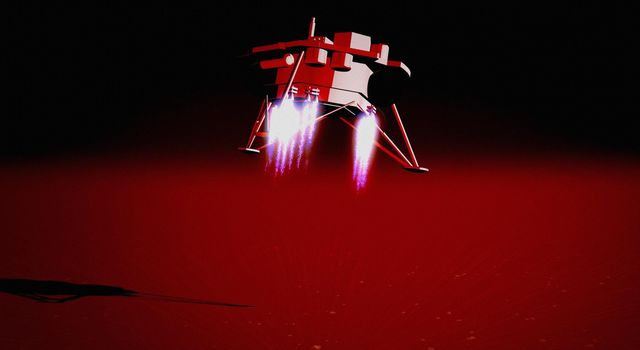

In [ ]:
featured_image = f"https://www.jpl.nasa.gov{images[0].find('img')['src']}"
print(featured_image)
browser.visit(featured_image)
Disp.Image(requests.get(featured_image).content)

In [ ]:
url3 = "https://twitter.com/marswxreport?lang=en"
browser.visit(url3)

In [ ]:
mars_twitter = browser.html
tweets_soup = bs(mars_twitter, 'html.parser')
tweet_text = tweets_soup.find_all('div', class_='js-tweet-text-container')
tweet_date = tweets_soup.find_all('a', class_='tweet-timestamp js-permalink js-nav js-tooltip')

In [ ]:
mars_weather_text = tweet_text[1].p.text
mars_weather_date = tweet_date[1].span.text
print(f"{mars_weather_text} {mars_weather_date}")

InSight sol 265 (2019-08-25) low -99.4ºC (-146.9ºF) high -26.3ºC (-15.3ºF)
winds from the SSE at 5.3 m/s (12.0 mph) gusting to 16.1 m/s (35.9 mph)
pressure at 7.50 hPapic.twitter.com/9YLawm67zS Aug 26


In [ ]:
url4 = "https://space-facts.com/mars/"
browser.visit(url4)

In [ ]:
facts_website = browser.html
facts_soup = bs(facts_website, 'html.parser')
facts_table = facts_soup.find_all('table', class_='tablepress tablepress-id-p-mars')

In [ ]:
column1 = [x.text for x in facts_table[0].find_all('td', class_='column-1')]
column2 = [x.text for x in facts_table[0].find_all('td', class_='column-2')]

In [ ]:
df = pd.DataFrame(data = column2, index = column1)
df

In [ ]:
df.to_html

In [ ]:
url5 = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
browser.visit(url5)

In [ ]:
hemispheres_website = browser.html
hemispheres = browser.find_link_by_partial_text('Hemisphere')

In [ ]:
urls = []
for x in hemispheres:
    urls.append(x["href"])

In [ ]:
hemispheres_pictures = []
for x in urls:
    browser.visit(x)
    hemispheres_website = browser.html
    hemispheres_soup = bs(hemispheres_website, 'html.parser')
    hemispheres_images = hemispheres_soup.find_all('img', class_='wide-image')
    for i in hemispheres_images:
        print(f"https://astrogeology.usgs.gov{i['src']}")
        hemispheres_pictures.append(f"https://astrogeology.usgs.gov{i['src']}")

In [ ]:
picture = hemispheres_pictures[0]
Disp.Image(requests.get(picture).content)

In [ ]:
picture = hemispheres_pictures[1]
Disp.Image(requests.get(picture).content)

In [ ]:
picture = hemispheres_pictures[2]
Disp.Image(requests.get(picture).content)

In [ ]:
picture = hemispheres_pictures[3]
Disp.Image(requests.get(picture).content)